In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="Arial", font_scale=1.15, style='ticks')
plt.rc("axes.spines", top=False, right=False)
#%matplotlib inline
sample_palette = {'AK1':'#FF0000', 'iPSC':'#154360', 'H1': '#40E0D0', 'NPC':'#229954', 'HG002': '#545454'}

### Input File

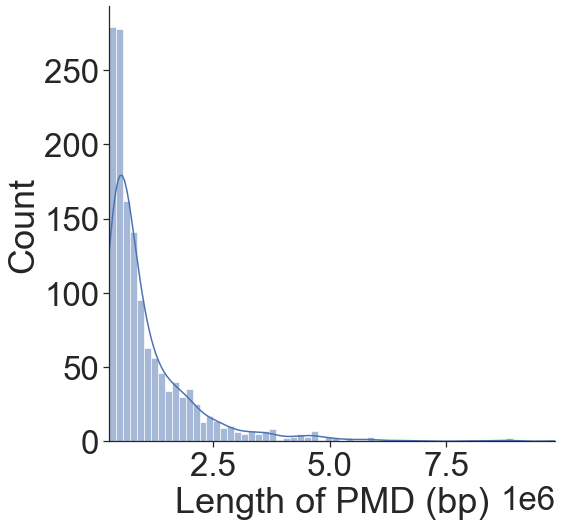

In [4]:
dir="/Users/mhryansohn/Desktop/01.Workspace/01.Projects/03.AK1-PacBio/01.DNA/Merged_Run/DNA_methylation/PMD_from_AK1_WGBS/"
ID, Length = list(), list()
with open(f"{dir}AK1_WGBS_PMD.bed", 'r') as pmdf:
    for line in pmdf:  
        line = line.strip('\n').split('\t')
    
        id = f"{line[0]}:{line[1]}-{line[2]}_AK1"
        length = int(line[2]) - int(line[1])
    
        ID.append(id)
        Length.append(length)

pmd_from_ak1_wgbs = pd.DataFrame(list(zip(ID, Length)), columns=['ID', 'Length']).set_index('ID')
del ID, Length

ID, Length = list(), list()
with open(f"{dir}HG002_WGBS_PMD.bed", 'r') as pmdf:
    for line in pmdf:  
        line = line.strip('\n').split('\t')
    
        id = f"{line[0]}:{line[1]}-{line[2]}_HG002"
        length = int(line[2]) - int(line[1])
    
        ID.append(id)
        Length.append(length)

pmd_from_hg002_wgbs = pd.DataFrame(list(zip(ID, Length)), columns=['ID', 'Length']).set_index('ID')
del ID, Length

pmd_total = pd.concat([pmd_from_ak1_wgbs, pmd_from_hg002_wgbs], axis=0)
pmd_total = pmd_total.assign(Sample=pmd_total.index.str.split('_').str[-1])

'''
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=pmd_from_ak1_wgbs, x='Length', kde=True, stat='count', ax=ax)
ax.set_xlim(pmd_from_ak1_wgbs['Length'].min(), pmd_from_ak1_wgbs['Length'].max())
ax.set_xlabel("Length of PMD (bp)")
sns.despine(ax=ax)
'''
fig, ax = plt.subplots(figsize=(8,8))
hist = sns.histplot(data=pmd_total, x='Length', hue='Sample', kde=True, stat='count', palette=sample_palette, ax=ax)
ax.set_xlim(pmd_total['Length'].min(), pmd_total['Length'].max())
ax.set_xlabel("Length of PMD (bp)")
ax.set_ylabel("The Number of PMD")
legend = ax.legend_
handles = legend.legendHandles
labels = [text.get_text() for text in legend.texts]

ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.8, 0.8), frameon=True, fancybox=False, edgecolor='black', prop={'size':15}, title=None)


ak1 = pd.read_table(f"{dir}AK1_AK1_WGBS_PMD_met.txt", index_col=0)
ipsc = pd.read_table(f"{dir}iPSC_AK1_WGBS_PMD_met.txt", index_col=0)
h1 = pd.read_table(f"{dir}H1_AK1_WGBS_PMD_met.txt", index_col=0)
npc = pd.read_table(f"{dir}NSC_AK1_WGBS_PMD_met.txt", index_col=0)

### Merging

In [5]:
merge = pd.concat([ak1, ipsc, h1, npc], axis=1)

### Analysis

Text(86.0, 0.5, 'PMDs from AK1 WGBS (N=1,427)')

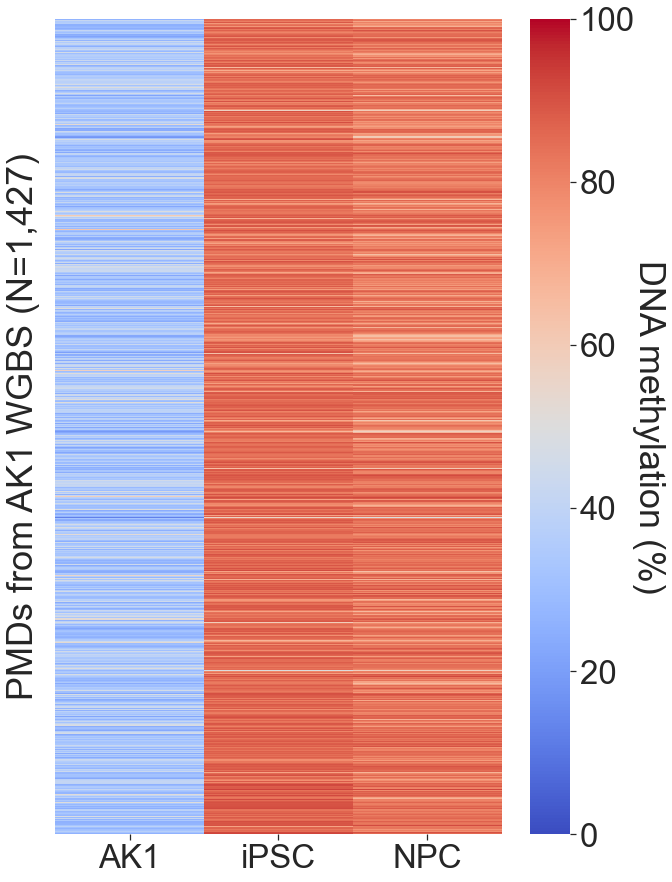

In [6]:
fig, ax = plt.subplots(figsize=(10,15))
heatmap = sns.heatmap(merge, vmin=0, vmax=100, xticklabels=True, yticklabels=False, cbar=True, cbar_kws={'label':'DNA methylation (%)'}, cmap='coolwarm', ax=ax)
heatmap.collections[0].colorbar.set_label(label='DNA methylation (%)', rotation=270, labelpad=30)
ax.set_ylabel('PMDs from AK1 WGBS (N=1,427)', labelpad=15)

### 100kb DNA methylation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Arial", font_scale=2, style='ticks')

#df1 = pd.read_table('100kb_individual/AK1_100kbmet.tab', index_col=0, header=None)
#df2 = pd.read_table('100kb_individual/iPSC_100kbmet.tab', index_col=0, header=None)
#df3 = pd.read_table('100kb_individual/H1_100kbmet.tab', index_col=0, header=None)
#df4 = pd.read_table('100kb_individual/NPC_100kbmet.tab', index_col=0, header=None)
#

#df = pd.concat([df1, df2, df3, df4], axis=1)

df1 = pd.read_table('AK1_100kbmet.tab', index_col=0, header=None)
df2 = pd.read_table('iPSC_100kbmet.tab', index_col=0, header=None)
df3 = pd.read_table('H1_100kbmet.tab', index_col=0, header=None)
df4 = pd.read_table('NPC_100kbmet.tab', index_col=0, header=None)
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['AK1', 'iPSC', 'H1', 'NPC']
df.index.name = 'Region'
df = df.dropna()


fig, axes = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.violinplot(data=df, palette={'AK1':'#FF0000', 'iPSC':'#154360', 'H1': '#40E0D0', 'NPC':'#229954'}, ax=axes)
axes.set_ylabel('100kb mCG Level (%)')
sns.despine(ax=axes)